In [6]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import plotly.figure_factory as ff
import urllib, json
import random

In [7]:
#https://medium.com/@enigma.pythonml/how-to-create-sankey-diagrams-from-data-frames-in-python-plotly-and-kaggles-titanic-data-1f7d56b28096
#https://zebrabi.com/guide/how-to-customize-sankey-diagram-in-python-matplotlib/
#https://python-graph-gallery.com/sankey-diagram-with-python-and-plotly/

In [8]:
np.random.seed(42)

# Create column names
locations = {
    'program1': ['site1', 'site2', 'site3', 'site4'],
    'program2': ['site1.1', 'site2.1', 'site3.1', 'site4.1', 'site5.1', 'site6.1', 'site7.1'],
    'program3': ['site1.2', 'site2.2', 'site3.2', 'site4.2', 'site5.2', 'site6.2', 'site7.2', 'site8.2', 'site9.2'],
    'program4': ['site1.3', 'site2.3', 'site3.3', 'site4.3', 'site5.3', 'site6.3', 'site7.3', 'site8.3',""]
}
years = list(range(2020, 2051))

# Create a DataFrame with random values
data = {
    'program1': np.random.choice(locations['program1'], size=100),
    'program2': np.random.choice(locations['program2'], size=100),  # Set size to 100 for program2
    'program3': np.random.choice(locations['program3'], size=100),  # Set size to 100 for program3
    'program4': np.random.choice(locations['program4'], size=100),  # Set size to 100 for program4
    **{f'Year_{year}': np.random.randint(51, 100, size=100) for year in years}
}

first_df = pd.DataFrame(data)

# Sum horizontally across year columns and create a 'Total' column
first_df['Total'] = first_df.loc[:, [f'Year_{year}' for year in years]].sum(axis=1)

# Display the DataFrame with the modifications

In [9]:
first_df.head()

program1 program2 program3 program4  Year_2020  Year_2021  Year_2022  \
0    site3  site7.1  site4.2                  58         51         66   
1    site4  site2.1  site7.2  site3.3         96         55         55   
2    site1  site2.1  site3.2  site3.3         66         95         85   
3    site3  site4.1  site6.2  site3.3         64         54         62   
4    site3  site2.1  site2.2  site4.3         62         66         75   

   Year_2023  Year_2024  Year_2025  ...  Year_2042  Year_2043  Year_2044  \
0         65         89         98  ...         68         51         90   
1         81         76         67  ...         79         52         64   
2         51         84         76  ...         56         98         75   
3         53         53         86  ...         82         79         72   
4         66         62         51  ...         79         83         80   

   Year_2045  Year_2046  Year_2047  Year_2048  Year_2049  Year_2050  Total  
0         62         95         72         53         90         85   2309  
1         67         69         83         95         78         61   2136  
2         64         92         67         53         97         96   2273  
3         64         85         74         77         89         71   2272  
4         84         96         84         93         56         71   2305  

[5 rows x 36 columns]

In [10]:
# Select columns that aren't years
subset_columns = ['program1', 'program2', 'program3', 'program4', 'Total']

# Create a new DataFrame with the selected columns
df = first_df.loc[:, subset_columns]

# Display the new DataFrame
df.head()

program1 program2 program3 program4  Total
0    site3  site7.1  site4.2            2309
1    site4  site2.1  site7.2  site3.3   2136
2    site1  site2.1  site3.2  site3.3   2273
3    site3  site4.1  site6.2  site3.3   2272
4    site3  site2.1  site2.2  site4.3   2305

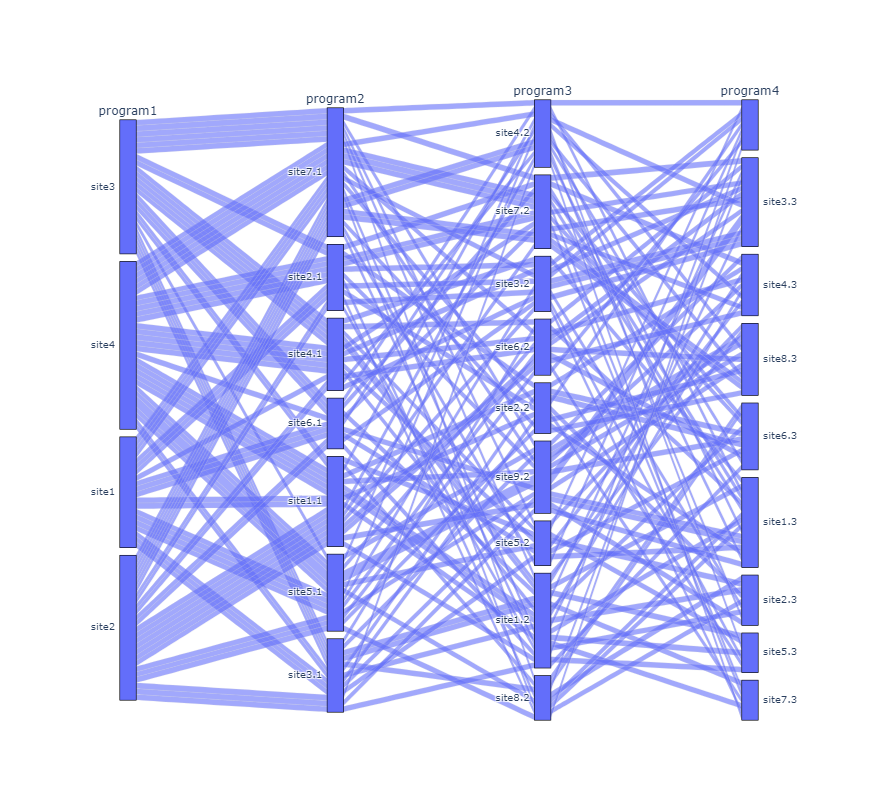

In [11]:
fig = go.Figure(go.Parcats(
    dimensions=[
        {'label': 'program1', 'values': df['program1']},
        {'label': 'program2', 'values': df['program2']},
        {'label': 'program3', 'values': df['program3']},
        {'label': 'program4', 'values': df['program4']}
    ],
    counts=df['Total'],
))
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

fig.show()

In [12]:
program1 = df["program1"].unique().tolist()
program2 = df["program2"].unique().tolist()
program3 = df["program3"].unique().tolist()
program4 = df["program4"].unique().tolist()

labels = program1 + program2 + program3 + program4

In [13]:
"""
We need three loops:
program1 -> program2
program2 -> program3
program3 -> program4
"""

sources = []
targets = []
values = []

for prog1 in program1:
    for prog2 in program2:
        df1 = df.loc[df["program1"] == prog1]
        total = df1.loc[df["program2"] == prog2,"Total"].sum()
        sources.append(labels.index(prog1))
        targets.append(labels.index(prog2))
        values.append(total)

for prog2 in program2:
    for prog3 in program3:
        df1 = df.loc[df["program2"] == prog2]
        total = df1.loc[df["program3"] == prog3,"Total"].sum()
        sources.append(labels.index(prog2))
        targets.append(labels.index(prog3))
        values.append(total)

for prog3 in program3:
    for prog4 in program4:
        df1 = df.loc[df["program3"] == prog3]
        total = df1.loc[df["program4"] == prog4,"Total"].sum()
        sources.append(labels.index(prog3))
        targets.append(labels.index(prog4))
        values.append(total)

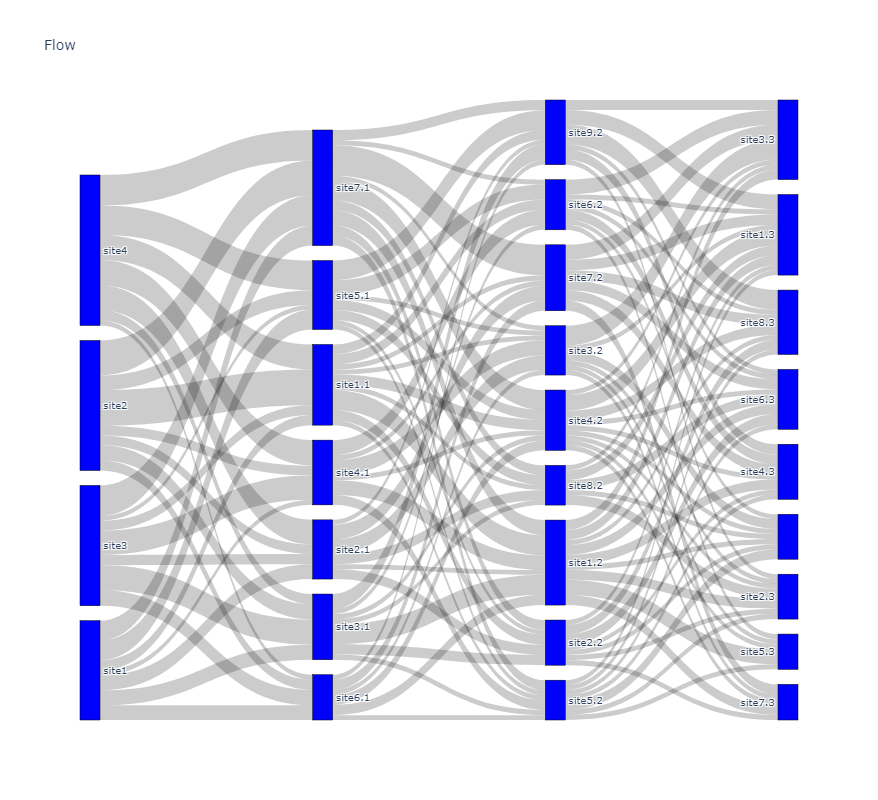

In [14]:
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = "blue"
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Flow", font_size=10)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()

## Arc Plot
- Arc plots are difficult to create with plotly
- You have to implement a custom solution
- Data must be in format found here:
- https://github.com/evelinag/StarWars-social-network/blob/master/networks/starwars-episode-7-interactions-allCharacters.json
- https://github.com/evelinag/StarWars-social-network/tree/master/networks
- https://lvngd.com/blog/arc-diagrams-d3js-data-preparation/

## Network Plot

In [15]:
import plotly.graph_objects as go
import networkx as nx
import gravis as gv
#https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/
# For 3D networks: https://plotly.com/python/v3/3d-network-graph/

In [16]:
df.head()

program1 program2 program3 program4  Total
0    site3  site7.1  site4.2            2309
1    site4  site2.1  site7.2  site3.3   2136
2    site1  site2.1  site3.2  site3.3   2273
3    site3  site4.1  site6.2  site3.3   2272
4    site3  site2.1  site2.2  site4.3   2305

In [17]:
def get_combinations(df, subset_columns = ['program1', 'program2', 'program3', 'program4']):    
    # Create a new DataFrame with the selected columns
    df1 = df.loc[:, subset_columns]
    combinations = []
    for idx, row in df1.iterrows():
        # Replace None with "Not Available"
        rows = row.values.tolist()
        row = ["Not Available" if not value else value for value in rows]
    
        for i in range(len(subset_columns)):  # Iterate over program1 to program4
            for j in range(i + 1, len(subset_columns)):  # Avoid duplicate combinations
                combinations.append((row[i], row[j]))
    return combinations

In [18]:
combinations = get_combinations(df,subset_columns = ['program1', 'program2'])

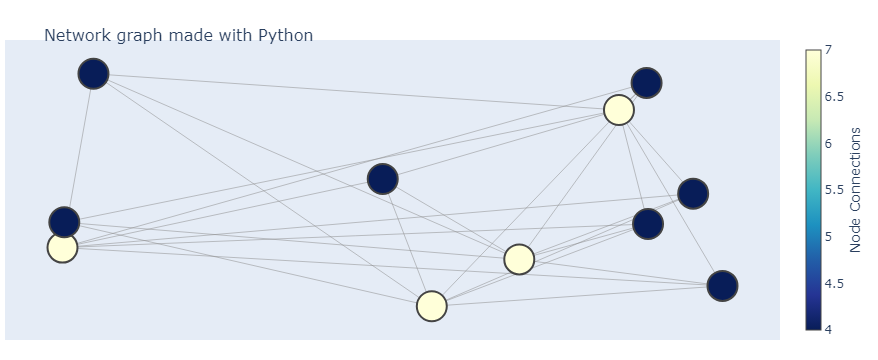

In [19]:
G = nx.Graph()
G.add_edges_from(combinations)
pos = {node: (random.uniform(0, 1), random.uniform(0, 1)) for node in G.nodes()}

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=30,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

node_adjacencies = []
node_text = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))

node_trace.marker.color = node_adjacencies
node_trace.text = node_text


fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

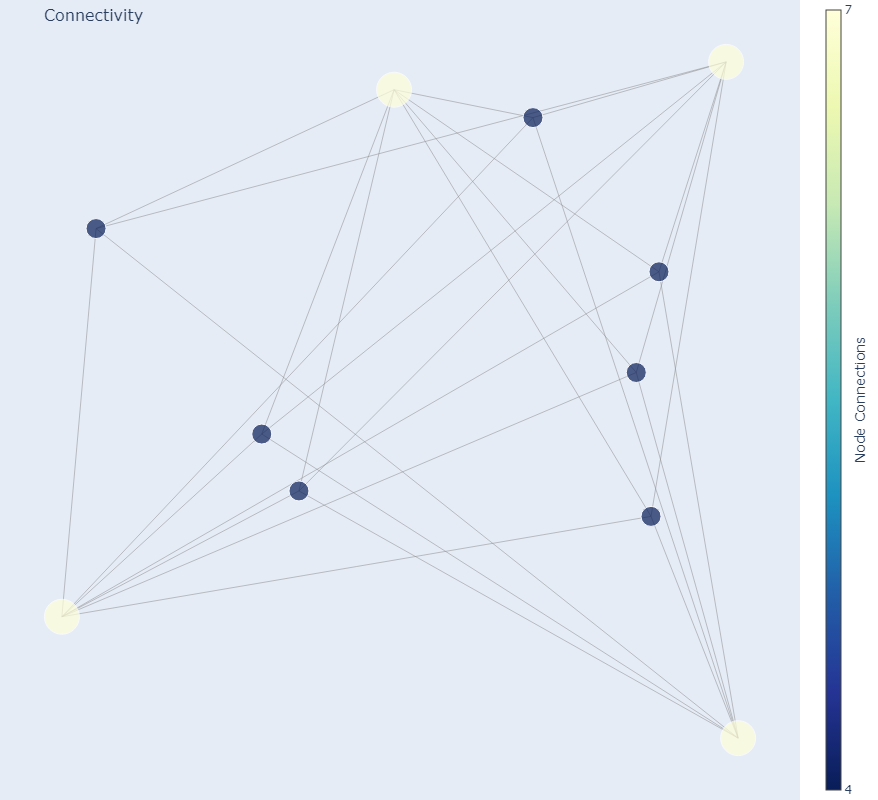

In [20]:
G = nx.Graph()
G.add_edges_from(combinations)

pos = {node: (random.uniform(0, 1), random.uniform(0, 1)) for node in G.nodes()}

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

# Modified node_trace definition
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=500,
        cmin=min(node_adjacencies),
        cmax=max(node_adjacencies),
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right',
            tickvals=[min(node_adjacencies), max(node_adjacencies)],
            ticktext=[f'{min(node_adjacencies)}', f'{max(node_adjacencies)}']
        )
    )
)

# Calculate node sizes based on the number of connections
node_adjacencies = [len(adjacencies[1]) for adjacencies in G.adjacency()]
node_trace.marker.size = [5 * count for count in node_adjacencies]
node_trace.marker.color = node_adjacencies  # Set node color based on the number of connections

# Set hover text to include node names
node_trace.text = [f'Node: {node}<br># of connections: {count}' for node, count in zip(G.nodes(), node_adjacencies)]


fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Connectivity',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                )
                )


fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)
fig.show()


In [21]:
gv.d3(G)

In [22]:
import networkx as nx
import random
import plotly.graph_objs as go
from IPython.display import display

# Callback not working!!!!!!!!!!!!

# Calculate node sizes based on the number of connections
node_adjacencies = [len(adjacencies[1]) for adjacencies in G.adjacency()]
node_trace.marker.size = [5 * count for count in node_adjacencies]
node_trace.marker.color = node_adjacencies  # Set node color based on the number of connections

# Set hover text to include node names
node_trace.text = [f'Node: {node}<br># of connections: {count}' for node, count in zip(G.nodes(), node_adjacencies)]

# Define the edge trace
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Add the edge trace to the figure
fig = go.FigureWidget(data=[edge_trace, node_trace])

# Create a callback function for node hover events
def update_edge_trace(trace, points, selector):
    if points.point_inds:
        selected_node = G.nodes()[points.point_inds[0]]
        connected_edges = list(G.edges(selected_node))
        selected_edge_x = []
        selected_edge_y = []

        for edge in connected_edges:
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            selected_edge_x.extend([x0, x1, None])
            selected_edge_y.extend([y0, y1, None])

        # Update the edge trace with the bolded edges
        with fig.batch_update():
            fig.data[0].line.width = 0.5
            fig.data[1].x = selected_edge_x
            fig.data[1].y = selected_edge_y
            fig.data[1].line.width = 2
            fig.data[1].line.color = 'red'

# Set up the callback for node hover events
fig.data[1].on_hover(update_edge_trace)

# Display the figure
display(fig)


FigureWidget({
    'data': [{'hoverinfo': 'none',
              'line': {'color': '#888', 'width': 0.5},
              'mode': 'lines',
              'type': 'scatter',
              'uid': 'fc4eb04d-f196-445b-8375-7080063dc58b',
              'x': [0.8067266370031634, 0.32089627578087787, None,
                    0.8067266370031634, 0.0901349928874301, None,
                    0.8067266370031634, 0.7212822539291169, None,
                    0.8067266370031634, 0.5870301853209589, None,
                    0.8067266370031634, 0.2785871871791531, None,
                    0.8067266370031634, 0.7045112852621328, None,
                    0.8067266370031634, 0.73033765425338, None,
                    0.32089627578087787, 0.05125693812812426, None,
                    0.32089627578087787, 0.8203301343795434, None,
                    0.32089627578087787, 0.42905195363545556, None,
                    0.8203301343795434, 0.7212822539291169, None,
                    0.8203301343795434, 

# Treemap

In [23]:
df.head()

program1 program2 program3 program4  Total
0    site3  site7.1  site4.2            2309
1    site4  site2.1  site7.2  site3.3   2136
2    site1  site2.1  site3.2  site3.3   2273
3    site3  site4.1  site6.2  site3.3   2272
4    site3  site2.1  site2.2  site4.3   2305

- Create a function that takes a subset of years of the original dataframe
- Perform Total aggregation based on the subset you select
- Default will be all of the years

In [53]:
#2020 is start, 2051 is max
years = list(range(2020, 2031))
year_subset = [f'Year_{year}' for year in years]

In [25]:
def subset_dataframe(df,years_subset=None, specific_year=None):
    required_columns = ['program1', 'program2', 'program3', 'program4']
    if years_subset:
        df = df.loc[:, required_columns + years_subset]
        df['Total'] = df.loc[:, years_subset].sum(axis=1)
    elif specific_year:
        df = df.loc[:, required_columns + [f'Year_{specific_year}']]
        df = df.rename(columns={f'Year_{specific_year}': 'Total'})
    else:
        df['Total'] = df.loc[:, [f'Year_{year}' for year in list(range(2020, 2051))]].sum(axis=1)
    return df[required_columns + ["Total"]]

In [26]:
df_2025 = subset_dataframe(first_df, years_subset = None, specific_year = 2025)
df_2025_2030 = subset_dataframe(first_df, years_subset = year_subset, specific_year = None)

In [27]:
def make_treemap(df):
    fig1 = px.treemap(
        df, 
        path=[
            px.Constant("all"), 'program1', 'program2', 'program3','program4'
        ], 
        values='Total'
    )
    fig1.update_traces(root_color="lightgrey")
    fig1.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    
    
    fig1.update_layout(
        autosize=False,
        width=800,
        height=800,
    )
    fig1.show()

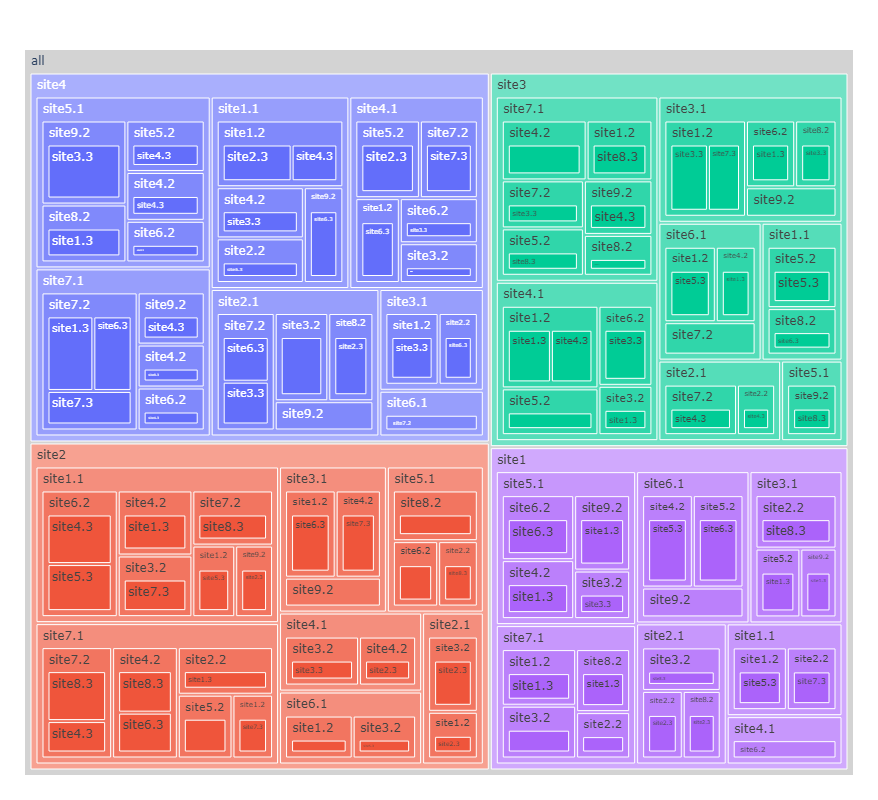

In [28]:
make_treemap(df_2025)

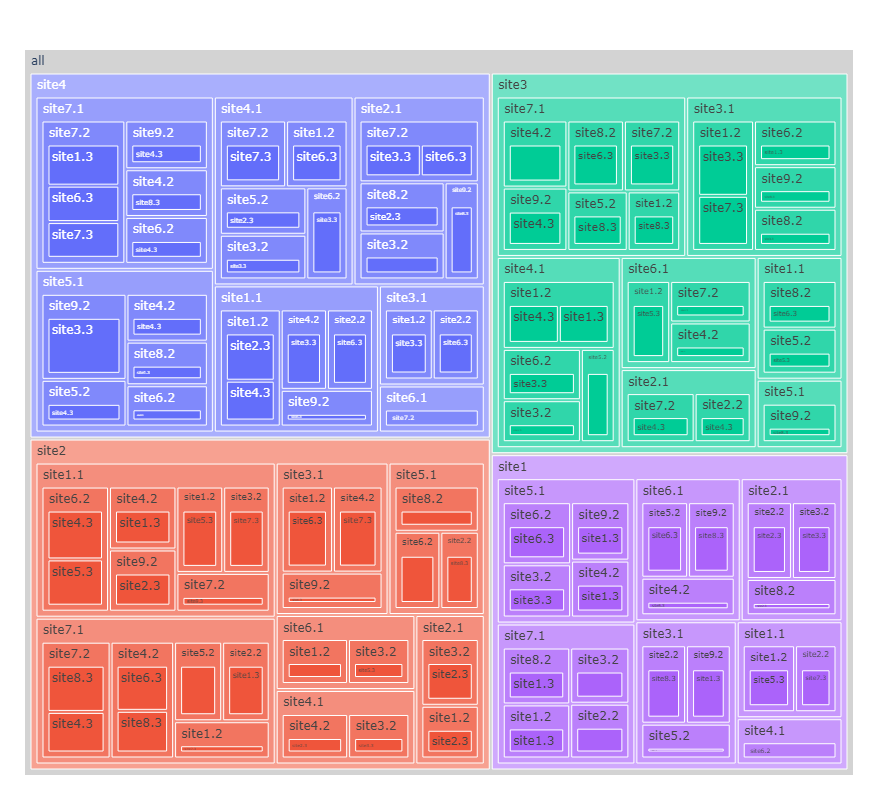

In [29]:
make_treemap(df_2025_2030)

In [30]:

def extract_relationships(dataframe):
    parents = []
    children = []

    for _, row in dataframe.iterrows():
        for i in range(len(row) - 1):
            parent_program = row.iloc[i]
            child_program = row.iloc[i + 1]

            if not pd.isnull(child_program):
                parents.append(parent_program)
                children.append(child_program)

    return list(set([f"{x}-{y}" for x,y in zip(parents,children)]))


# Extract relationships
relations = extract_relationships(df[df.columns.tolist()[:len(df.columns)-1]])

## Waffle Chart

In [3]:
# useful libraries, including pyWaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle
import matplotlib.patches as mpatches

import pandas as pd

In [47]:
cols = [col for col in first_df.columns if col not in ["program3","program4","Total"]]
subset = first_df[cols]

In [55]:
subset_df = pd.DataFrame(subset.groupby(["program1","program2"]).sum()[year_subset])

In [78]:
subset_df

Year_2020  Year_2021  Year_2022  Year_2023  Year_2024  \
program1 program2                                                          
site1    site1.1         172        154        140        126        175   
         site2.1         229        246        248        198        227   
         site3.1         246        223        196        198        262   
         site4.1          78         52         73         62         55   
         site5.1         286        334        277        273        300   
         site6.1         192        237        230        222        235   
         site7.1         294        322        273        311        260   
site2    site1.1         531        522        511        522        502   
         site2.1         137        124        110        164        127   
         site3.1         230        232        220        212        235   
         site4.1         154        122        145        137        145   
         site5.1         234        212        225        225        245   
         site6.1         142        141        127        155        136   
         site7.1         531        491        577        597        555   
site3    site1.1         166        147        174        152        153   
         site2.1         144        126        156        127        123   
         site3.1         388        403        410        442        313   
         site4.1         377        384        385        317        309   
         site5.1          71         63         97         64         76   
         site6.1         252        261        235        190        259   
         site7.1         412        484        466        410        454   
site4    site1.1         383        396        426        362        374   
         site2.1         377        351        359        402        325   
         site3.1         138        173        173        111        123   
         site4.1         389        417        316        436        413   
         site5.1         465        452        474        407        478   
         site6.1          99         85         99         53         78   
         site7.1         426        442        469        441        452   

                   Year_2025  Year_2026  Year_2027  Year_2028  Year_2029  \
program1 program2                                                          
site1    site1.1         163        153        132        178        155   
         site2.1         194        225        246        230        210   
         site3.1         215        209        214        193        251   
         site4.1          85         61         90         71         74   
         site5.1         328        269        299        337        316   
         site6.1         262        178        226        240        234   
         site7.1         297        351        334        270        249   
site2    site1.1         574        510        537        576        546   
         site2.1         141        158        172        151        137   
         site3.1         237        264        278        252        262   
         site4.1         170        153        180        143        139   
         site5.1         213        251        241        224        189   
         site6.1         157        162        172        139        147   
         site7.1         518        531        491        568        490   
site3    site1.1         167        126        192        144        150   
         site2.1         148        173        174        150        131   
         site3.1         348        354        372        327        393   
         site4.1         388        312        311        351        354   
         site5.1          74         75         94         88         93   
         site6.1         213        207        222        239        247   
         site7.1         451        399        413        463     

In [79]:
site = subset_df.iloc[subset_df.index.get_level_values("program1") == "site1"]
plot1 = {
    'values': [value for value in site['Year_2020']],
    'labels': [f"{index} ({value})" for index, value in zip(site['Year_2020'],site.index.get_level_values("program2").tolist())],
    'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
    'title': {'label': 'Total for Year_2020', 'loc': 'left', 'fontsize': 12}
}

plot2 = {
    'values': [value for value in site['Year_2021']],
    'labels': [f"{index} ({value})" for index, value in zip(site['Year_2021'],site.index.get_level_values("program2").tolist())],
    'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
    'title': {'label': 'Total for Year_2021', 'loc': 'left', 'fontsize': 12}
}

plot3 = {
    'values': [value for value in site['Year_2022']],
    'labels': [f"{index} ({value})" for index, value in zip(site['Year_2022'],site.index.get_level_values("program2").tolist())],
    'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
    'title': {'label': 'Total for Year_2022', 'loc': 'left', 'fontsize': 12}
}

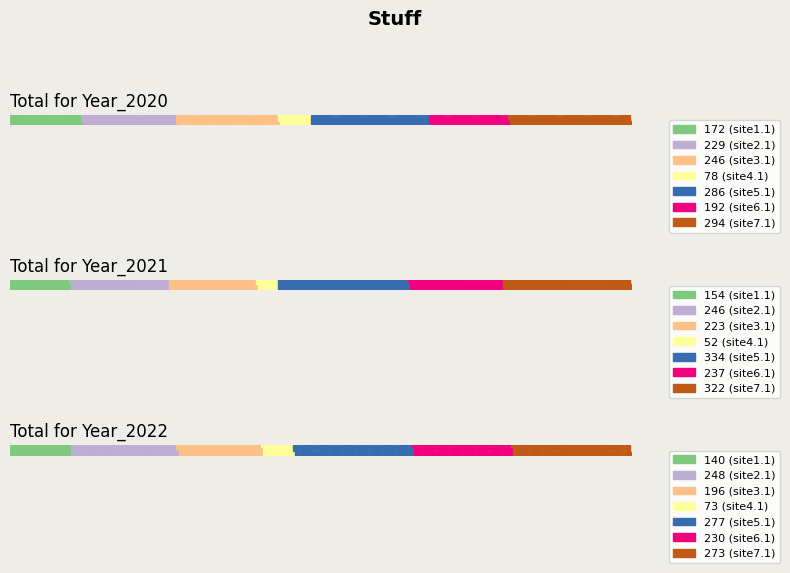

In [82]:
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 6)
)

# Add a title and a small detail at the bottom
fig.suptitle('Stuff', fontsize=14, fontweight='bold')
fig.supxlabel('',
              fontsize=8,
              x=0.14, # position at the 14% axis
             )
fig.set_facecolor('#EEEDE7')

plt.show()

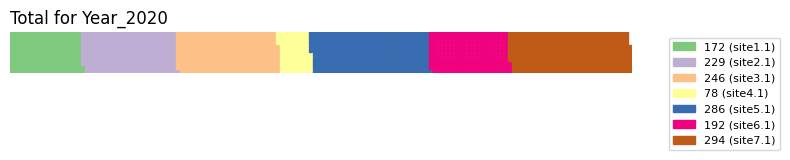

In [106]:
plot = {
    'values': [value for value in site['Year_2020'].values],
    'labels': [f"{index} ({value})" for index, value in zip(site['Year_2020'].values.tolist(),site.index.get_level_values("program2").tolist())],
    'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
    'title': {'label': 'Total for Year_2020', 'loc': 'left', 'fontsize': 12}
}

fig = plt.figure(
    FigureClass=Waffle,
    plots={211: plot},
    rows=10, # Outside parameter, this seems to mess everything up
    cmap_name="Accent", # Change color with cmap
    figsize=(8, 6)
)

# Display the chart
plt.show()

In [86]:
data = {'labels': ['Car', 'Truck', 'Motorcycle'],
        'Factory A': [32384, 13354, 5245],
        'Factory B': [22147, 6678, 2156],
        'Factory C': [8932, 3879, 896],
       }
d = pd.DataFrame(data).set_index('labels')

In [87]:
d

Factory A  Factory B  Factory C
labels                                     
Car             32384      22147       8932
Truck           13354       6678       3879
Motorcycle       5245       2156        896